First, let us unzip the data into the server

In [1]:
from zipfile import ZipFile
file_name = '/content/drive/My Drive/ELL888/Training.zip'
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


First, let us install the module for extracting rar files

In [2]:
!pip install rarfile

     |████████████████████████████████| 122kB 8.3MB/s 
  Created wheel for rarfile: filename=rarfile-3.1-cp36-none-any.whl size=24908 sha256=aa363b8a67b63646c95c7474b8bc539bf386369b07d1697d9aa73620f03fdb89
  Stored in directory: /root/.cache/pip/wheels/23/3c/c8/0215b6a5079492eff3be3f545ae0b0c4a66734c35c9e444eac
Successfully built rarfile


In [0]:
from rarfile import RarFile
file_name = '/content/drive/My Drive/ELL888/TestResizedMasks.rar'
r = RarFile(file_name)
r.extractall()
r.close()

Now, we will analyse some of the images of the dataset

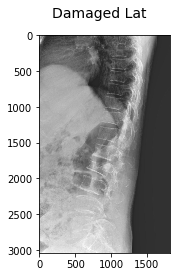

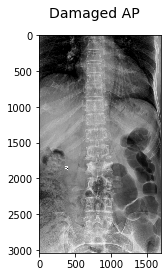

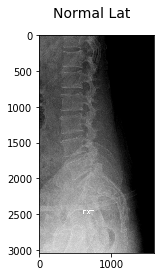

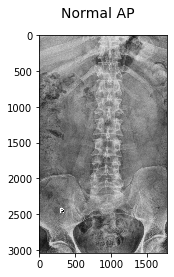

In [3]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from random import seed
from random import randint

#seed random number generator
seed(0)

#index for the damaged image
damaged_idx = randint(1,328)
#index for the non-damaged image
normal_idx = randint(1,350)

#damaged_images
damaged_img_ap_path = '/content/Training/Damaged/ID (' + str(damaged_idx) + ')/AP/AP.jpg'
damaged_img_lat_path = '/content/Training/Damaged/ID (' + str(damaged_idx) + ')/LAT/LAT.jpg'

#normal images
normal_img_ap_path = '/content/Training/Normal/ID (' + str(normal_idx) + ')/AP/AP.jpg'
normal_img_lat_path = '/content/Training/Normal/ID (' + str(normal_idx) + ')/LAT/LAT.jpg'

#displaying the damaged images
damaged_img_lat = mpimg.imread(damaged_img_lat_path)
fig1 = plt.figure(1)
fig1.suptitle('Damaged Lat', fontsize = 14)
plt.imshow(damaged_img_lat)
damaged_img_ap = mpimg.imread(damaged_img_ap_path)
fig2 = plt.figure(2)
fig2.suptitle('Damaged AP', fontsize = 14)
plt.imshow(damaged_img_ap)

#displaying the normal images
normal_img_lat = mpimg.imread(normal_img_lat_path)
fig3 = plt.figure(3)
fig3.suptitle('Normal Lat', fontsize = 14)
plt.imshow(normal_img_lat)
normal_img_ap = mpimg.imread(normal_img_ap_path)
fig4 = plt.figure(4)
fig4.suptitle('Normal AP', fontsize = 14)
plt.imshow(normal_img_ap)

Now, we will rearrange the data for classification

In [4]:
from PIL import Image
import os, sys
os.mkdir(os.path.join('/content', 'ELL888_Assignment1'))
os.mkdir(os.path.join('/content/ELL888_Assignment1','AP'))
os.mkdir(os.path.join('/content/ELL888_Assignment1','LAT'))
os.mkdir(os.path.join('/content/ELL888_Assignment1/AP','Damaged'))
os.mkdir(os.path.join('/content/ELL888_Assignment1/AP','Normal'))
os.mkdir(os.path.join('/content/ELL888_Assignment1/LAT','Damaged'))
os.mkdir(os.path.join('/content/ELL888_Assignment1/LAT','Normal'))
#Reorder the Damaged Images
path_damaged = '/content/Training/Damaged/'
print("Damaged")
for i in range(1,329):
  try:
    im_AP = Image.open(path_damaged + 'ID (' + str(i) + ')/AP/AP.jpg')
    im_LAT = Image.open(path_damaged + 'ID (' + str(i) + ')/LAT/LAT.jpg')
    AP_fname = 'AP (' + str(i) + ')'
    LAT_fname = 'LAT (' + str(i) + ')' 
    im_AP.save('/content/ELL888_Assignment1/AP/Damaged/' + AP_fname + '.png','PNG', quality = 90)
    im_LAT.save('/content/ELL888_Assignment1/LAT/Damaged/' + LAT_fname + '.png','PNG', quality = 90)
    print("Saved AP and LAT images number " + str(i))
  except FileNotFoundError:
    print('AP or LAT (' + str(i) + ') does not exist')

#Reorder the Normal Images
path_normal = '/content/Training/Normal/'
print("Normal")
for i in range(1,350):
  try:
    im_AP = Image.open(path_normal + 'ID (' + str(i) + ')/AP/AP.jpg')
    im_LAT = Image.open(path_normal + 'ID (' + str(i) + ')/LAT/LAT.jpg')
    AP_fname = 'AP (' + str(i) + ')'
    LAT_fname = 'LAT (' + str(i) + ')' 
    im_AP.save('/content/ELL888_Assignment1/AP/Normal/' + AP_fname + '.png','PNG', quality = 90)
    im_LAT.save('/content/ELL888_Assignment1/LAT/Normal/' + LAT_fname + '.png','PNG', quality = 90)
    print("Saved AP and LAT images number " + str(i))
  except FileNotFoundError:
    print('AP or LAT (' + str(i) + ') does not exist')


Damaged
Saved AP and LAT images number 1
Saved AP and LAT images number 2
Saved AP and LAT images number 3
Saved AP and LAT images number 4
Saved AP and LAT images number 5
Saved AP and LAT images number 6
Saved AP and LAT images number 7
Saved AP and LAT images number 8
Saved AP and LAT images number 9
Saved AP and LAT images number 10
Saved AP and LAT images number 11
Saved AP and LAT images number 12
Saved AP and LAT images number 13
Saved AP and LAT images number 14
Saved AP and LAT images number 15
Saved AP and LAT images number 16
Saved AP and LAT images number 17
Saved AP and LAT images number 18
Saved AP and LAT images number 19
Saved AP and LAT images number 20
Saved AP and LAT images number 21
Saved AP and LAT images number 22
Saved AP and LAT images number 23
Saved AP and LAT images number 24
Saved AP and LAT images number 25
Saved AP and LAT images number 26
Saved AP and LAT images number 27
Saved AP and LAT images number 28
Saved AP and LAT images number 29
Saved AP and LA

Now, we will bring the images into the desired form - with same size and in a list

In [0]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
train_datagen = ImageDataGenerator(shear_range = 0, zoom_range = 0, horizontal_flip = False, width_shift_range = 0, height_shift_range = 0)
AP_traindata = train_datagen.flow_from_directory('/content/ELL888_Assignment1/AP', target_size = (512,256), subset = 'training', color_mode='rgb', batch_size = 672, shuffle = False)
LAT_traindata = train_datagen.flow_from_directory('/content/ELL888_Assignment1/LAT', target_size = (512,256), subset = 'training', color_mode='rgb', batch_size = 672, shuffle = False)
x_AP,y_AP = AP_traindata.next()
x_LAT, y_LAT = LAT_traindata.next()

In [0]:
import os
import sys
a = np.random.permutation(672)
x_AP = x_AP[a]
x_LAT = x_LAT[a]
y_AP = y_AP[a]
y_LAT = y_LAT[a]

In [15]:
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, Dropout, Input, Concatenate
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.xception import Xception, preprocess_input
from keras.applications.resnet import ResNet50
from keras.models import load_model, Model
import keras.callbacks as kcall
import numpy as np
import matplotlib.pyplot as plt
from keras.applications import imagenet_utils
from keras.layers import *
base_model_ = ResNet50(include_top=False, weights='imagenet', layers= 1, input_shape=(512, 256, 3), pooling=None)

preds1 = base_model_.predict(x_AP)
preds2 = base_model_.predict(x_LAT)

inputsA = Input(shape= (16, 8, 2048,))
inputsB = Input(shape= (16, 8, 2048,))

x = Flatten()(inputsA)
x = Dropout(.2)(x)
x = Dense(256, activation= 'relu')(x)
modelA = Model(input = inputsA, output=x)


y = Flatten()(inputsB)
y = Dropout(.2)(y)
y = Dense(256, activation= 'relu')(y)
modelB = Model(input = inputsB, output=y)

from keras.layers import *

mergedOut = Concatenate()([modelA.output, modelB.output])
mergedOut = Dropout(.3)(mergedOut)
mergedOut = Dense(256, activation='relu')(mergedOut)
mergedOut = Dropout(.4)(mergedOut)
mergedOut = Dense(128, activation='relu')(mergedOut)
mergedOut = Dropout(.5)(mergedOut)
mergedOut = Dense(1, activation='sigmoid')(mergedOut)
model = Model(inputs = [modelA.input, modelB.input], output = mergedOut)
model.summary()
model.compile(optimizer=Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])

Using TensorFlow backend.


NameError: ignored

In [0]:
results = model.fit([preds1, preds2], y_AP[:,0], batch_size = 4, epochs = 25, shuffle = True, validation_split = 0.2)

Now we will try to visualise the model using tSNE

In [0]:
model.save('/content/drive/My Drive/ELL888/assgn1_classification')

In [0]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import pandas as pd
from sklearn.decomposition import TruncatedSVD
import seaborn as sns
AP_fit = x_AP[:,:,:,0]
AP_fit = AP_fit.reshape([672,512*256])
LAT_fit = x_LAT[:,:,:,0]
LAT_fit = LAT_fit.reshape([672,512*256])
svd = TruncatedSVD(n_components=50, random_state=42)
AP_reduced = svd.fit_transform(AP_fit)
LAT_reduced = svd.fit_transform(LAT_fit)
AP_embedded = TSNE(n_components=2, perplexity = 15).fit_transform(AP_reduced)
LAT_embedded = TSNE(n_components=2, perplexity = 15).fit_transform(LAT_reduced)

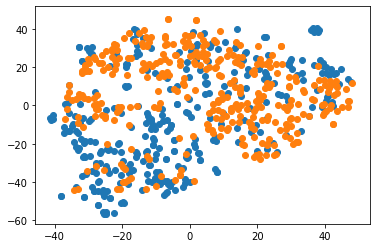

In [0]:
plt.scatter(AP_embedded[0:327,0], AP_embedded[0:327,1]) #Damaged AP - blue
plt.scatter(AP_embedded[327:,0], AP_embedded[327:,1]) #Normal AP - orange

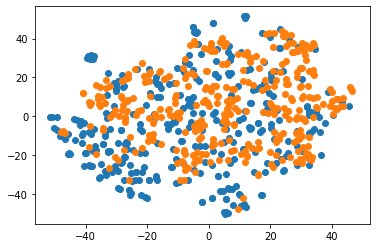

In [0]:
plt.scatter(LAT_embedded[0:327,0], LAT_embedded[0:327,1]) #Damaged AP
plt.scatter(LAT_embedded[327:,0], LAT_embedded[327:,1]) #Normal AP

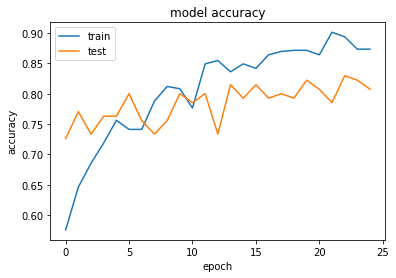

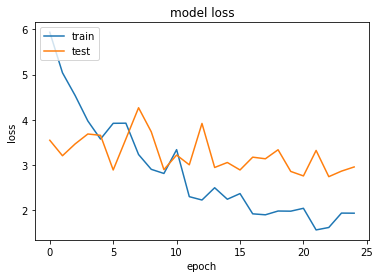

In [0]:
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
print(results.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [1]:
#os.mkdir(os.path.join('/content', 'ELL888_Assignment1_Test'))
#os.mkdir(os.path.join('/content/ELL888_Assignment1_Test','AP'))
#os.mkdir(os.path.join('/content/ELL888_Assignment1_Test','LAT'))
#os.mkdir(os.path.join('/content/ELL888_Assignment1_Test/AP','Damaged'))
#os.mkdir(os.path.join('/content/ELL888_Assignment1_Test/AP','Normal'))
#os.mkdir(os.path.join('/content/ELL888_Assignment1_Test/LAT','Damaged'))
#os.mkdir(os.path.join('/content/ELL888_Assignment1_Test/LAT','Normal'))
from PIL import Image
test_path = '/content/TestResizedMasks/'
AP_test = []
LAT_test = []
for i in range(1,301):
  try:
    im_AP = Image.open(test_path + 'Test (' + str(i) + ')/AP/AP.jpg')
    im_LAT = Image.open(test_path + 'Test (' + str(i) + ')/LAT/LAT.jpg')
    AP_fname = 'AP (' + str(i) + ')'
    LAT_fname = 'LAT (' + str(i) + ')' 
    im_AP.save('/content/ELL888_Assignment1_Test/AP/Dummy/' + AP_fname + '.png','PNG', quality = 90)
    im_LAT.save('/content/ELL888_Assignment1_Test/LAT/Dummy/' + LAT_fname + '.png','PNG', quality = 90)
    print("Saved AP and LAT images number " + str(i))
  except FileNotFoundError:
    print('AP or LAT (' + str(i) + ') does not exist')

Saved AP and LAT images number 1
Saved AP and LAT images number 2
Saved AP and LAT images number 3
Saved AP and LAT images number 4
Saved AP and LAT images number 5
Saved AP and LAT images number 6
Saved AP and LAT images number 7
Saved AP and LAT images number 8
Saved AP and LAT images number 9
Saved AP and LAT images number 10
Saved AP and LAT images number 11
Saved AP and LAT images number 12
Saved AP and LAT images number 13
Saved AP and LAT images number 14
Saved AP and LAT images number 15
Saved AP and LAT images number 16
Saved AP and LAT images number 17
Saved AP and LAT images number 18
Saved AP and LAT images number 19
Saved AP and LAT images number 20
Saved AP and LAT images number 21
Saved AP and LAT images number 22
Saved AP and LAT images number 23
Saved AP and LAT images number 24
Saved AP and LAT images number 25
Saved AP and LAT images number 26
Saved AP and LAT images number 27
Saved AP and LAT images number 28
Saved AP and LAT images number 29
Saved AP and LAT images

In [4]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
train_datagen = ImageDataGenerator(shear_range = 0, zoom_range = 0, horizontal_flip = False, width_shift_range = 0, height_shift_range = 0)
AP_testdata = train_datagen.flow_from_directory('/content/ELL888_Assignment1_Test/AP', target_size = (512,256), subset = 'training', color_mode='rgb', batch_size = 299, shuffle = False)
LAT_testdata = train_datagen.flow_from_directory('/content/ELL888_Assignment1_Test/LAT', target_size = (512,256), subset = 'training', color_mode='rgb', batch_size = 299, shuffle = False)
AP_test,a = AP_testdata.next()
LAT_test,b = LAT_testdata.next()

Found 298 images belonging to 2 classes.
Found 298 images belonging to 2 classes.


In [1]:
import numpy as np
AP_test = np.empty([298])
LAT_test = []
from PIL import Image
for i in range(1,301):
  try:
    AP_test.append(np.asarray(Image.open('/content/ELL888_Assignment1_Test/AP/AP ('+ str(i) + ').png')))
    LAT_test.append(np.asarray(Image.open('/content/ELL888_Assignment1_Test/LAT/LAT ('+ str(i) + ').png')))
    print(i)
  except FileNotFoundError:
    print("AP or LAT numbered " + str(i) + " not found")

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
AP or LAT numbered 164 not found
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
AP or LAT numbered 245 not found
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
26

In [0]:
import numpy as np
AP_final = np.asarray(AP_test)
#AP_test = np.asarray(AP_test)
LAT_final = np.asarray(LAT_test)
del(AP_test)
del(LAT_test)

In [0]:
from keras.models import load_model
from keras.applications.resnet import ResNet50
base_model = ResNet50(include_top=False, weights='imagenet', layers= 1, input_shape=(512, 256, 3), pooling=None)
model = load_model('/content/drive/My Drive/ELL888/assgn1_classification')

In [0]:
AP_pred = base_model.predict(AP_test)
LAT_pred = base_model.predict(LAT_test)
test_results = model.predict([AP_pred,LAT_pred])

In [0]:
np.savetxt('/content/drive/My Drive/ELL888/class_results.csv', test_results)

In [41]:
test_results = test_results.reshape([298,])
test_results.shape


(298,)

In [0]:
my_arr = np.array(range(1,301))
my_arr = np.delete(my_arr,163)
my_arr = np.delete(my_arr,246)
my_arr.shape
dictionary = {}
for a,b in zip(my_arr, test_results):
  dictionary[a] = b

In [0]:
import pickle
pickle_out = open("/content/drive/My Drive/ELL888/classification_results.pickle","wb")
pickle.dump(dictionary,pickle_out)